In [162]:
import os
import pandas as pd
files = os.listdir('./data/')

tline_top_files = [file for file in files if '6990' in file]
tline_lodge_files = [file for file in files if '5880' in file]
meadows_files = [file for file in files if 'MtHood' in file]
print(tline_top_files)
print()
print(tline_lodge_files)
print()
print(meadows_files)

['Timberline-MagicMile_6990_feet_2014.csv', 'Timberline-MagicMile_6990_feet_2017.csv', 'Timberline-MagicMile_6990_feet_2016.csv', 'Timberline-MagicMile_6990_feet_2015.csv']

['TimberlineLodge_5880_feet_2017.csv', 'TimberlineLodge_5880_feet_2016.csv', 'TimberlineLodge_5880_feet_2014.csv', 'TimberlineLodge_5880_feet_2015.csv']

['MtHoodMeadows-CascadeExpress_7300_feet_2014.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2015.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2016.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2017.csv']


In [163]:
def assemble(filelist, label):
    frame = pd.DataFrame()
    num_rows = 0
    for file in filelist:
        tmp = pd.read_csv('./data/' + file)
        num_rows += len(tmp)
        tmp.index = tmp['Date/Time (PST)'].map(lambda x: pd.to_datetime(x, utc='America/Los_Angeles'))
        # tmp.index = tmp.index.tz_convert('America/Los_Angeles')
        del(tmp['Date/Time (PST)'])
        tmp.columns = [col.replace(' (")', '').replace(' (deg F)', '').replace(' (mph)', '').replace(' (%)', '').replace(' ', '_') + label for col in tmp.columns]
        frame = pd.concat([frame, tmp])
        print(num_rows, 'added:', len(frame))
    return frame

In [164]:
# tline_top = assemble(tline_top_files, '_tt')
tline_lodge = assemble(tline_lodge_files, '_tl')
# meadows = assemble(meadows_files, '_m')

# weather = pd.concat([meadows, tline_top, tline_lodge], axis=1)

8179 added: 8179
16964 added: 16964
18944 added: 18944
27634 added: 27634


In [165]:
weather = tline_lodge

In [166]:
weather.sort_index(inplace=True)
weather.head()

,Battery_Voltage_(v)_tl,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Minimum_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,Precipitation_tl,24_hour_snowfall_tl,Snow_Depth_tl
Date/Time (PST),,,,,,,,,,
2014-09-23 09:00:00+00:00,11.69,54.18,60.46,-0.034,0.572,6.927,267.7,0.0,30.880,4.007
2014-09-23 10:00:00+00:00,11.69,54.18,60.46,-0.034,0.572,6.927,267.7,0.0,4.007,30.880
2014-09-23 11:00:00+00:00,11.44,53.69,60.46,-0.034,2.113,8.540,253.8,0.0,3.077,31.350
2014-09-23 12:00:00+00:00,11.70,54.79,64.29,-0.034,3.683,12.170,236.7,0.0,3.077,31.410
2014-09-23 13:00:00+00:00,11.17,53.57,70.40,0.000,5.422,16.640,252.7,0.0,-6999.000,30.820


In [167]:
# weather.drop(weather.index[0], inplace=True)

In [168]:
diff = weather.index[1:] - weather.index[:-1]

In [169]:
diff.max()  # longest gap without weather data

Timedelta('13 days 13:00:00')

In [170]:
# start picking cleanest rough equivalent data; drop dumb stuff also

for col in ['Battery_Voltage_(v)_tl',
            'Wind_Speed_Minimum_tl']:
    weather.drop(col, axis=1, inplace=True)

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
mask = weather['24_hour_snowfall_tl'] > 50
weather['24_hour_snowfall_tl'] = weather['24_hour_snowfall_tl'].values.clip(0)
weather['24_hour_snowfall_tl'] = weather['24_hour_snowfall_tl'].apply(lambda x: 0 if x > 40 else x)

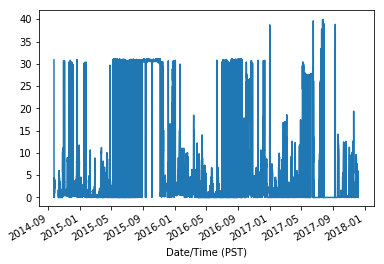

In [173]:
weather['24_hour_snowfall_tl'].plot()

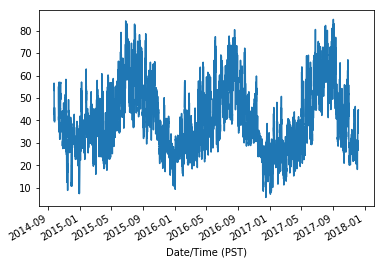

In [175]:
weather.Temperature_tl.plot()

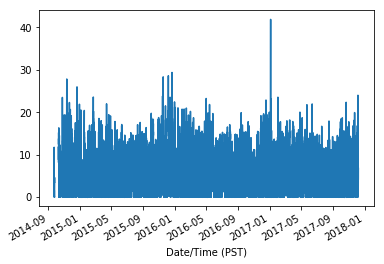

In [176]:
weather.Wind_Speed_Average_tl.plot()

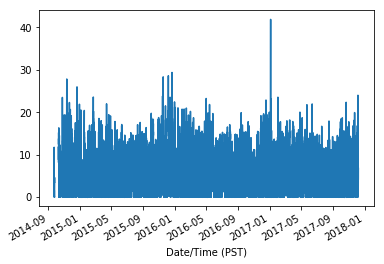

In [177]:
weather.Wind_Speed_Average_tl.plot()

In [178]:
weather.columns

Index(['Temperature_tl', 'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'Precipitation_tl',
       '24_hour_snowfall_tl', 'Snow_Depth_tl'],
      dtype='object')

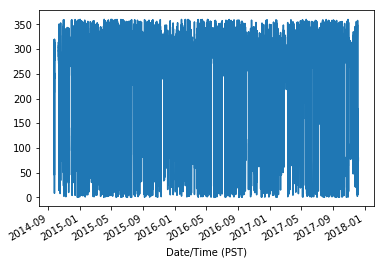

In [179]:
weather['Wind_Direction_(deg.)_tl'].plot()

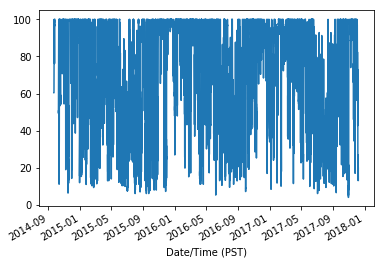

In [180]:
weather.Relative_Humidity_tl.plot()

In [181]:
weather.to_csv('timberline_clean_data.csv')